<a href="https://colab.research.google.com/github/CesAug/TA-Projetinhos/blob/main/Projeto%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conhecendo o dataset
O objetivo deste notebook é analisar o dataset de asteróides e criar uma rede neural capaz de predizer se um determinado asteróide é ou não prejudicial para o planeta Terra.

Antes de iniciar a análise, é importante conhecermos as features contidas neste dataset.

● id: ID exclusivo para cada asteroide;

● name: nome do asteroide dado pela NASA;

● est_diameter_min: diâmetro mínimo estimado em km;

● est_diameter_max: diâmetro máximo estimado em km;

● relative_velocity: velocidade relativa à Terra;

● miss_distance: distância perdida em km;

● orbiting_body: planeta que o asteroide orbita;

● sentry_object: incluído no sentry - um sistema automatizado de
monitoramento de colisões;

● absolute_magnitude: descreve a luminosidade intrínseca;

● hazardous: feature booleana que mostra se o asteroide é prejudicial ou não.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Turing/2º Projeto - Asteroides/neo.csv")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


As colunas de identificação 'name' e 'id' não influenciam de forma alguma na análise, por isso serão excluídas.

In [35]:
df.drop(columns = ["name", "id"], inplace = True)

Agora, vamos observar como o dataset está distribuído

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   orbiting_body       90836 non-null  object 
 5   sentry_object       90836 non-null  bool   
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 4.3+ MB


Temos, então, 5 features numéricas, 1 categórica e duas features booleanas. Sendo uma delas a nossa target, a feature "hazardous".

#Analisando as features
Para que possamos criar um modelo mais efetivo, vamos entender as features contidas no dataset. Começando pela feature categórica.

In [37]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

Todos os asteróides contidos no dataset estão orbitando a Terra, portanto esta não é uma variável interessante de se seguir analisando, uma vez que é a única opção disponível nesta feature.

In [38]:
print(pd.Series(df['sentry_object'].unique()), end = '\n----')

0    False
dtype: bool
----

Da mesma forma que ocorreu com a análise de orbiting_body, concluímos que é desnecessária a análise de "sentry_object", uma vez que todos os valores para essa feature são iguais.

In [39]:
df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Contagem de astros por velocidade')

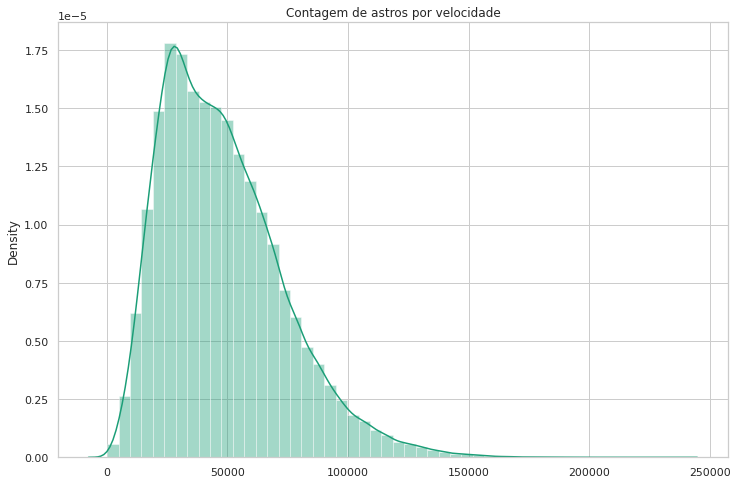

In [40]:
plt.figure(figsize = (12, 8))
sns.set_theme(style = 'whitegrid', palette = 'Dark2')
f = sns.distplot(x = df["relative_velocity"])
f.set_title("Contagem de astros por velocidade")

Ao analisarmos a distribuição dos asteróides por velocidade, torna-se evidente a concentração de astros com velocidade em torno de 50000 km/h.

Text(0.5, 1.0, 'Relação entre diâmetro máximo e mínimo')

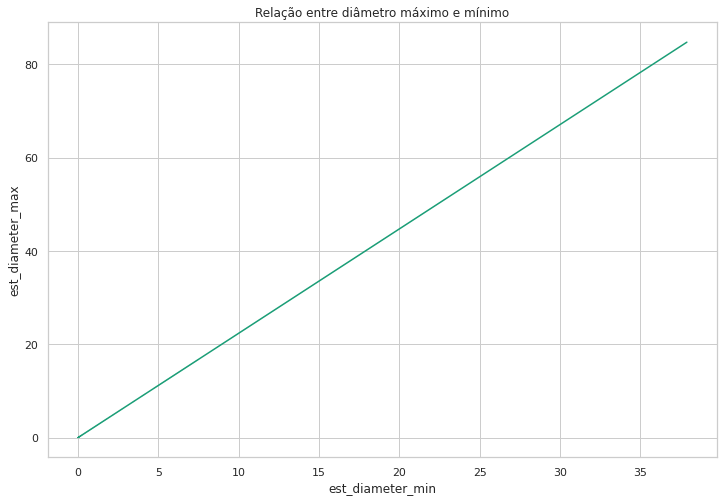

In [41]:
plt.figure(figsize = (12, 8))
f = sns.lineplot(x = df['est_diameter_min'], y = df['est_diameter_max'])
f.set_title("Relação entre diâmetro máximo e mínimo")

O gráfico acima nos traz uma informação já esperada: o diâmetro mínimo e o diâmetro máximo estimados para um mesmo asteróide são diretamente proporcionais. Sendo assim, para treinar o nosso modelo, basta incluirmos uma das duas features.

Text(0.5, 1.0, 'Contagem de astros por velocidade com foco na periculosidade')

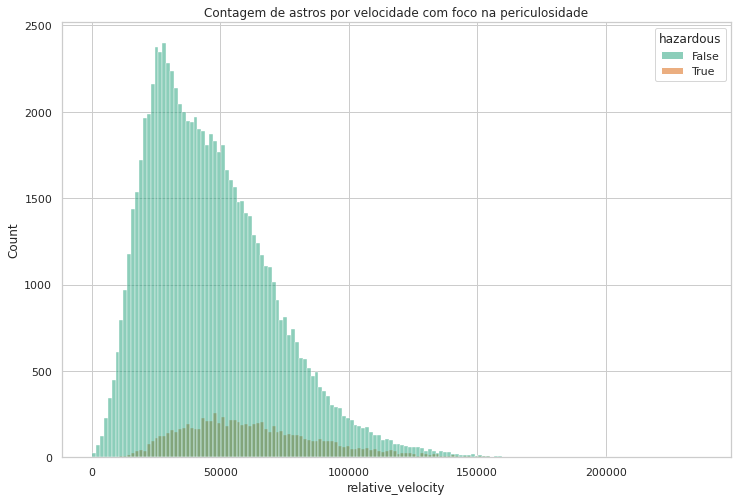

In [42]:
plt.figure(figsize = (12,8))
f = sns.histplot(x = df['relative_velocity'], hue = df['hazardous'])
f.set_title("Contagem de astros por velocidade com foco na periculosidade")

A maioria dos asteróides registrados possui velocidades relativas em torno de 50000. Coincidentemente, são esses os valores de velocidade relativa para a maioria dos asteróides registrados como perigosos. Conforme os valores de velocidade sobem, tanto a quantidade total de asteróides quanto a quantidade de asteróides perigosos tende a diminuir.

Text(0.5, 1.0, 'Distribuição de miss_distance com foco na periculosidade')

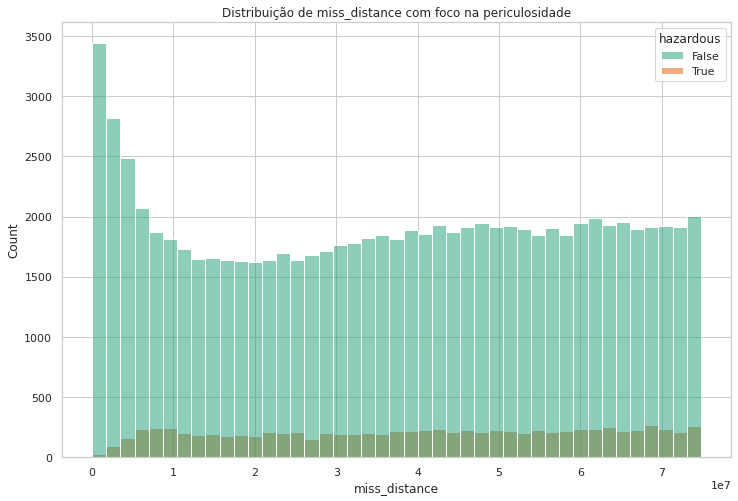

In [43]:
plt.figure(figsize = (12, 8))
f = sns.histplot(x = df['miss_distance'], hue = df['hazardous'] )
f.set_title("Distribuição de miss_distance com foco na periculosidade")

O valor de miss distance para os diversos asteróides tem uma distribuição bastante uniforme, ainda que a maioria tenha miss distance menor que 1e7. Com relação ao perigo gerado por cada um desses asteróides, vemos uma distribuição bastante similar, porém inversa entre aqueles com menor valor de miss distance. Entre esses, o perigo é menor.

Text(0.5, 1.0, 'Distribuição de astros por luminosidade intrínseca segmentado por perigo')

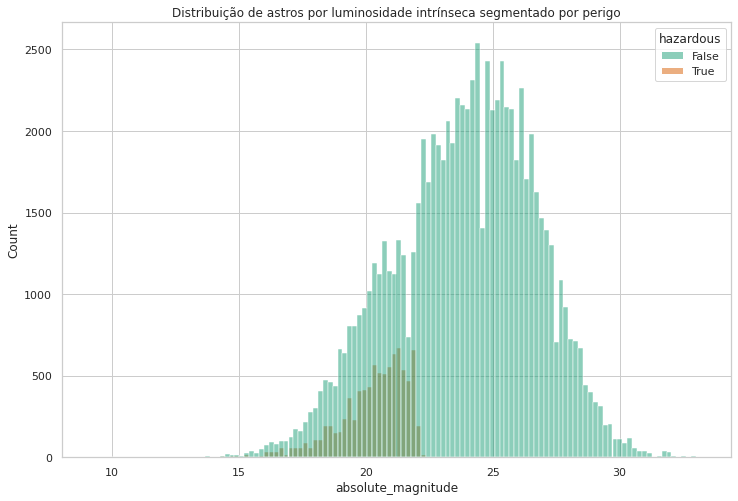

In [44]:
plt.figure(figsize = (12, 8))
f = sns.histplot(x = df['absolute_magnitude'], hue = df['hazardous'])
f.set_title("Distribuição de astros por luminosidade intrínseca segmentado por perigo")

A maioria dos asteróides catalogados possui iluminosidade intrínseca por volta de 25. No entanto, aqueles que apresentam um nível maior de periculosidade tem iluminosidade intrínseca menor, em torno de 20.

Text(0.5, 1.0, 'Relação entre a velocidade e o tamanho de cada asteróide')

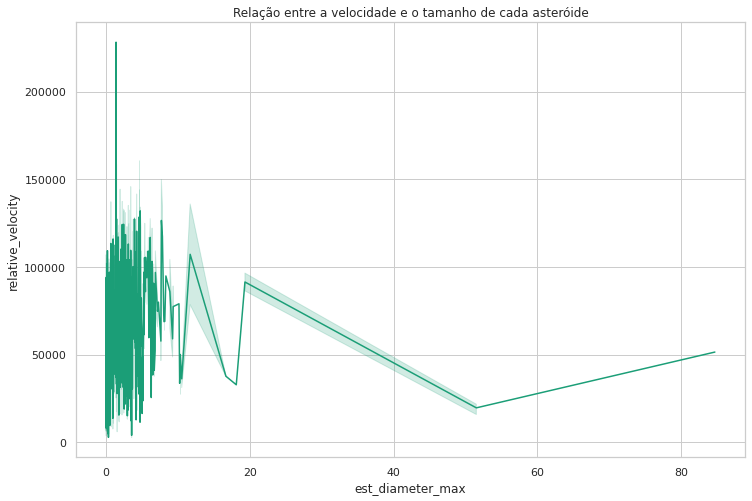

In [45]:
plt.figure(figsize = (12, 8))
f = sns.lineplot(y = df['relative_velocity'], x = df['est_diameter_max'])
f.set_title("Relação entre a velocidade e o tamanho de cada asteróide")

Nota-se alguma relação entre a distância e a velocidade. Quanto maior o asteróide, menor tende a ser a sua velocidade. 

Isto, porém, mostra-se um problema quando percebemos que a maior quantidade de asteróides considerados perigosos tem velocidade relativa em torno de 50000, justamente o valor para o qual tende a velocidade dos maiores astros.

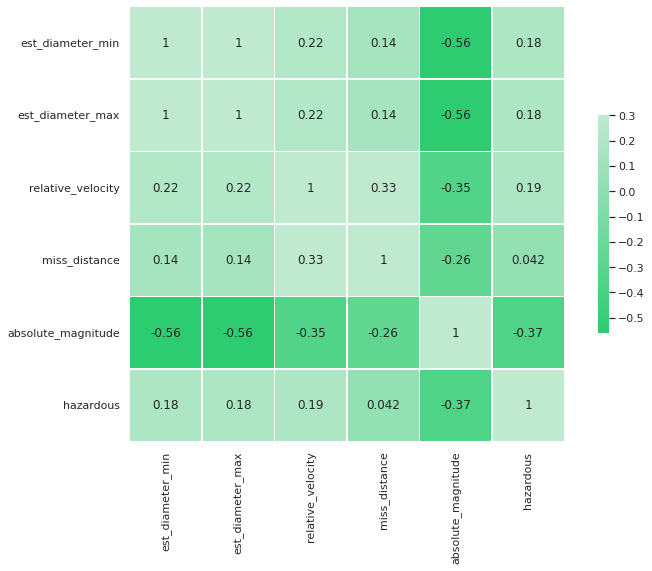

In [46]:
dt = df.drop(columns = ['sentry_object'])
plt.figure(figsize = (12, 8))
#cmap = sns.diverging_palette(150, 275, s = 80, l = 55, n = 9,  as_cmap=True)
cmap = sns.light_palette("#2ecc71", reverse = True, as_cmap=True)
#mask = np.triu(np.ones_like(dt.corr(), dtype=bool))

sns.heatmap(dt.corr(), vmax=.3, center=0, cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

Com a matriz de correlação acima, podemos notar que, além das relações já encontradas entre as features, tais como o comportamento exatamente igual das features de diâmetro, a relação entre a periculosidade e a velocidade relativa de cada asteróide, e a relação entre "hazardous" e "absolute_magnitude", há também uma relação entre "relative_velocity" e "absolute_magnitude".

Text(0.5, 1.0, 'Relação entre luminosidade intrínseca e velocidade')

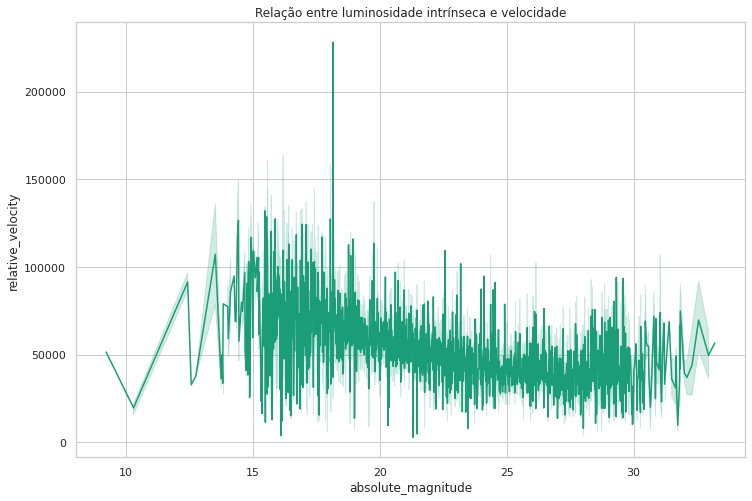

In [47]:
plt.figure(figsize = (12, 8))
f = sns.lineplot(data = df, x = 'absolute_magnitude', y = 'relative_velocity')
f.set_title ("Relação entre luminosidade intrínseca e velocidade")

Conforme o heatmap nos revelou, com o aumento da iluminosidade intrínseca dos asteróides há uma queda na velocidade relativa desses astros. Como a queda está atrelada ao risco de cada asteróide, com o aumento da iluminosidade, temos também uma diminuição do perigo representado por cada asteróide.

##Conclusão
A partir de uma breve análise, percebe-se que nem todas as features são necessárias para o treinamento do modelo, sendo algumas por só possuírem um resultado possível e outras por serem redudantes. 

As features relacionadas ao tamanho, à velocidade e à iluminação intrínseca de cada astro são as que contêm um volume maior de informações que tornam possível a classificação por nível de periculosidade. Por outro lado, a feature miss_distance revela muito pouco sobre cada asteróide, afinal, exceto os primeiros níveis, todos apresentam valores bem similares.

#Estabelecendo uma rede neural preditiva

##Transformando os dados

Antes de seguirmos com a montagem da rede neural, é necessário que normalizemos os dados, para torná-los comparáveis e que realizemos o encoding das variáveis booleanas, que, no caso, é apenas a feature hazardous.

In [287]:
dc = df.drop(columns = ['est_diameter_max', 'sentry_object', 'orbiting_body', 'hazardous'])

Em razão das conclusões obtidas durante a análise, retiramos algumas colunas do dataset.

In [288]:
encoding_hazardous = pd.get_dummies(df['hazardous']) #Transformando a feature em valores numéricos

In [290]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dc)

Com os dados já transformados, vamos separá-los em informações de treino e de teste. Para isso, utilizaremos a função Train Test Split, do SKLearn

In [304]:
from sklearn.model_selection import train_test_split
y = encoding_hazardous
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size  = 0.3)

##Estabelecendo o modelo
Com os dados devidamente tratados, podemos dar continuidade à criação da nossa rede neural

In [322]:
import keras
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = "sigmoid"))


In [323]:
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics= ['accuracy', 'AUC','Recall'])

Pronto! A rede neural está construída, agora vamos treiná-la

In [324]:
train = model.fit(X_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
994/994 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.8977 - auc: 0.9578 - recall: 0.9072
Epoch 2/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1952 - accuracy: 0.9088 - auc: 0.9739 - recall: 0.9075
Epoch 3/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1887 - accuracy: 0.9112 - auc: 0.9750 - recall: 0.9111
Epoch 4/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1867 - accuracy: 0.9115 - auc: 0.9757 - recall: 0.9116
Epoch 5/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1857 - accuracy: 0.9123 - auc: 0.9760 - recall: 0.9125
Epoch 6/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1851 - accuracy: 0.9123 - auc: 0.9761 - recall: 0.9126
Epoch 7/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1846 - accuracy: 0.9123 - auc: 0.9763 - recall: 0.9127
Epoch 8/10
994/994 [==============================] - 2s 2ms/step - loss: 0.1844 - 

In [325]:
results = model.evaluate(X_test, y_test)

852/852 [==============================] - 2s 2ms/step - loss: 0.1855 - accuracy: 0.9105 - auc: 0.9758 - recall: 0.9109


##Conclusão
Como é possível perceber, o modelo de rede neural construído mostra-se bastante capaz de predizer o nível de perigo de um dado asteróide. O modelo apresenta um bom índice AUC, e um bom recall, indicando que as previsões tem sido acertadas, isto é, a rede classifica um número baixíssimo de asteróides perigosos como não periogos, portanto tem uma quantidade de falsos negativos pequena.

Quando análisamos os resultados do modelo com os dados de teste, chegamos a uma conclusão semelhante. Portanto, o modelo comprova sua capacidade em predizer a periculosidade de um asteróide.